In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

from utils import *
from utils_plotting import *

# KiDS, SDSS cleaned, mags + colors + class_star, R cut, all tiles

In [3]:
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'

## OLD: all data, all features

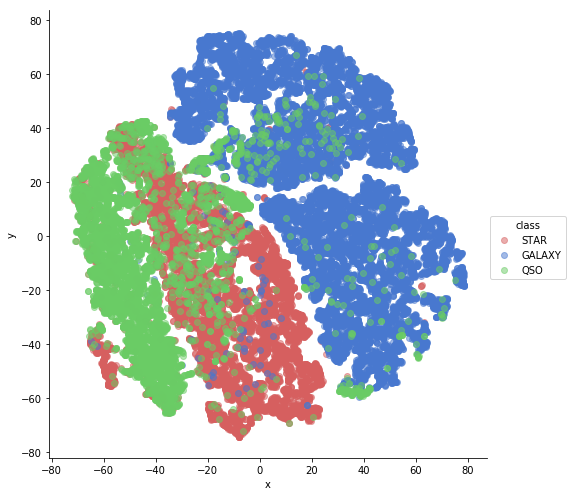

In [11]:
plot_embedding(X_embedded, data_sampled['CLASS'], label_name='class')

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


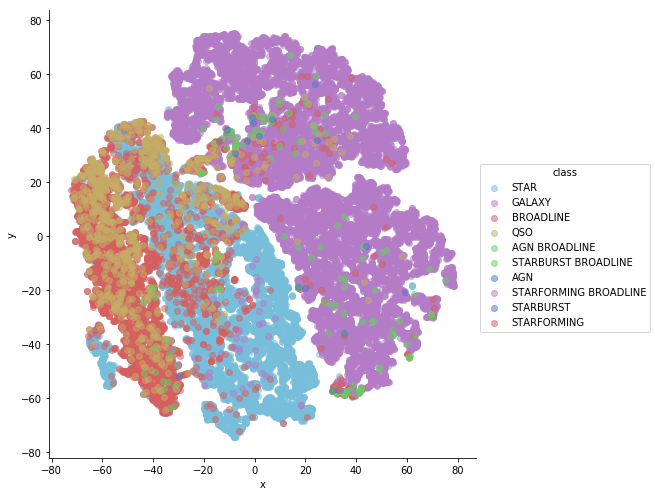

In [20]:
qso_subclass = data['CLASS']
qso_subclass.loc[data['CLASS'] == 'QSO'] = data.loc[data['CLASS'] == 'QSO', 'SUBCLASS']
qso_subclass = qso_subclass.fillna('QSO')
plot_embedding(X_embedded, qso_subclass, label_name='class')

## All data, No subsets, all features

In [4]:
data = process_kids(data_path, sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [5]:
# data_sampled = data.sample(20000, random_state=4591)
X = data[FEATURES['all']]
X_scaled = MinMaxScaler().fit_transform(X)

In [6]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

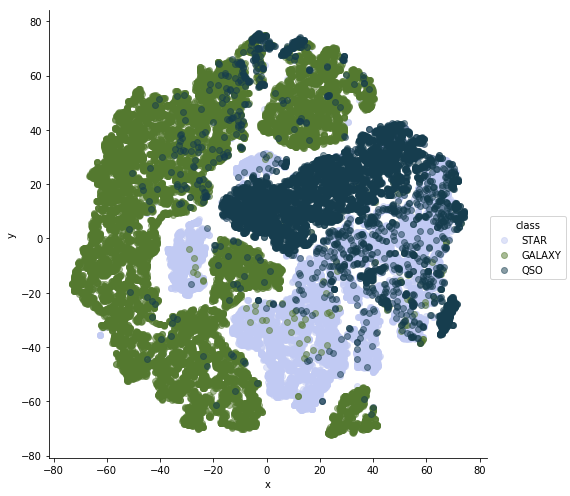

In [24]:
plot_embedding(X_embedded, data['CLASS'], label='class')

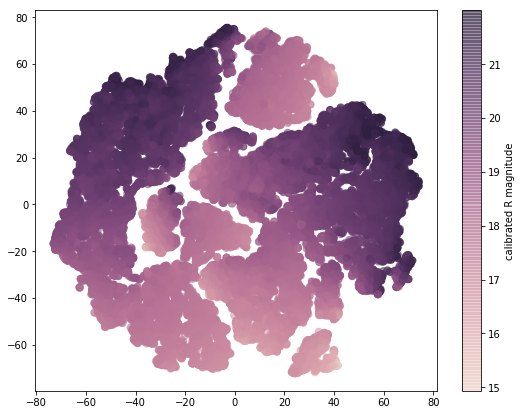

In [14]:
plot_embedding(X_embedded, data[MAG_GAAP_CALIB_R], label='calibrated R magnitude', is_continuous=True)

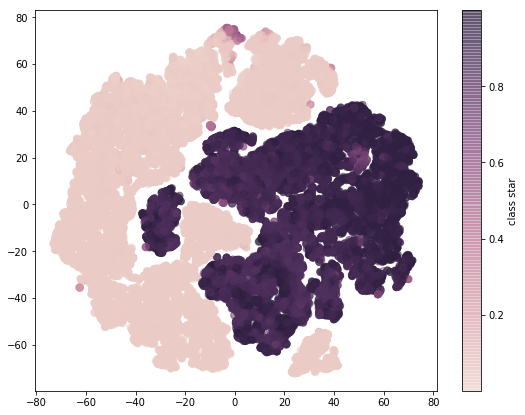

In [15]:
plot_embedding(X_embedded, data['CLASS_STAR'], label='class star', is_continuous=True)

## No subsets, all features

In [4]:
data = process_kids(data_path, sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [7]:
data_sampled = data.sample(20000, random_state=4591)
X = data_sampled[FEATURES['all']]
X_scaled = MinMaxScaler().fit_transform(X)

In [8]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

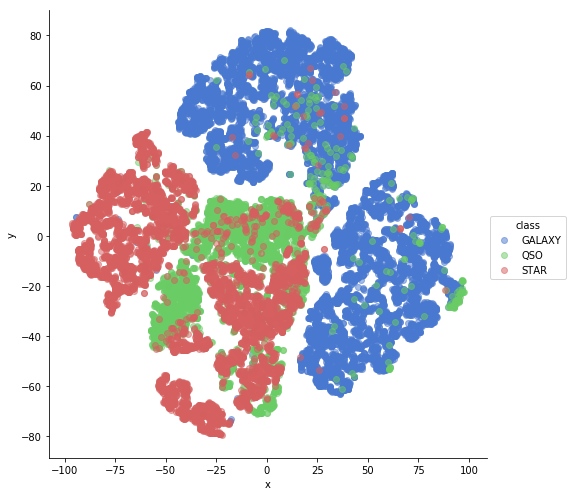

In [9]:
plot_embedding(X_embedded, data_sampled['CLASS'], label_name='class')

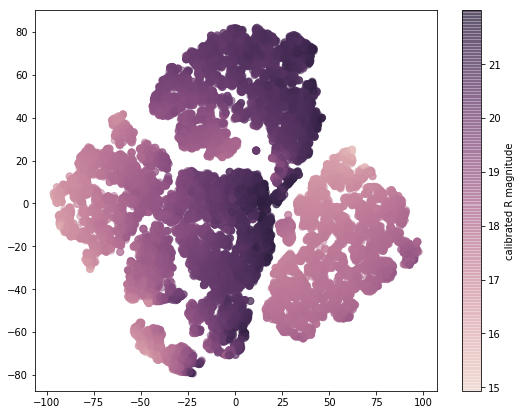

In [10]:
plot_embedding(X_embedded, data_sampled[MAG_GAAP_CALIB_R], label_name='calibrated R magnitude', is_continuous=True)

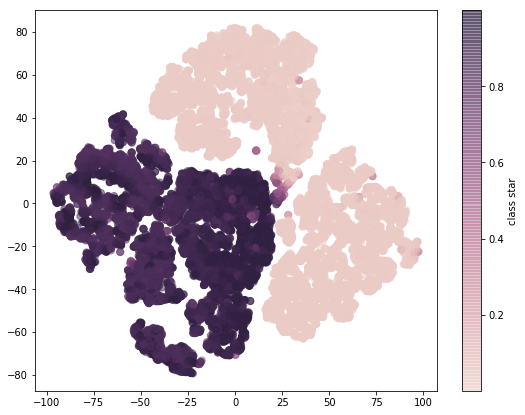

In [11]:
plot_embedding(X_embedded, data_sampled['CLASS_STAR'], label_name='class star', is_continuous=True)

## No subsets, colors

In [4]:
data = process_kids(data_path, sdss_cleaning=True, cut='u-g')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [12]:
data_sampled = data.sample(20000, random_state=4591)
X = data_sampled[FEATURES['colors-cstar']]
X_scaled = MinMaxScaler().fit_transform(X)

In [13]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

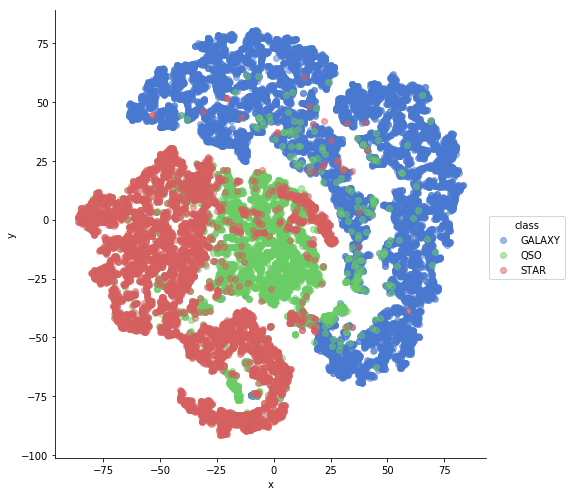

In [15]:
plot_embedding(X_embedded, data_sampled['CLASS'], label='class')

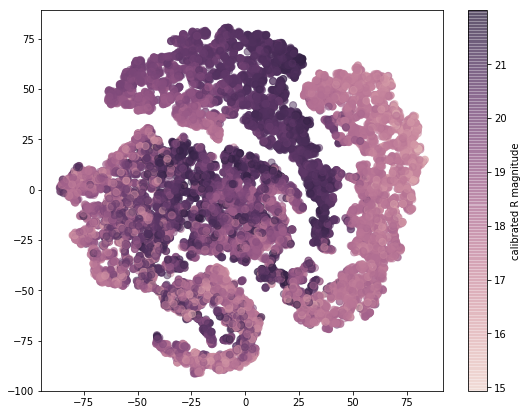

In [16]:
plot_embedding(X_embedded, data_sampled[MAG_GAAP_CALIB_R], label='calibrated R magnitude', is_continuous=True)

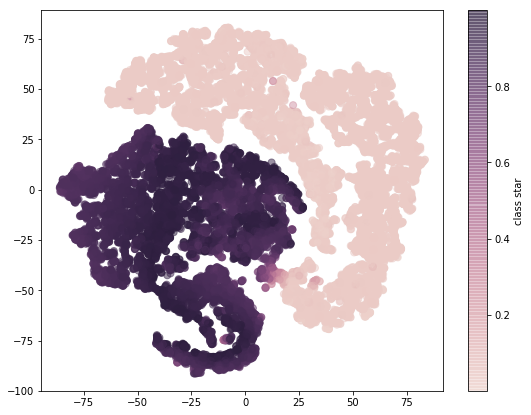

In [17]:
plot_embedding(X_embedded, data_sampled['CLASS_STAR'], label='class star', is_continuous=True)

## Stars, colors + class_star

In [44]:
data = process_kids(data_path, sdss_cleaning=True, cut='r', subset='star')

Data shape: (91317, 43)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Extracting star subset: 19114
Cleaning SDSS: 16282 left
Removing R > 22: 16082 left


In [45]:
X = data[FEATURES['colors-cstar']]

In [46]:
X_scaled = MinMaxScaler().fit_transform(X)

In [42]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

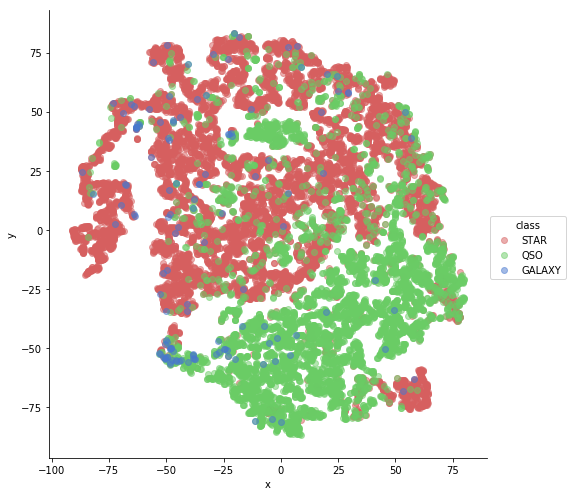

In [47]:
plot_embedding(X_embedded, data['CLASS'], label_name='class')

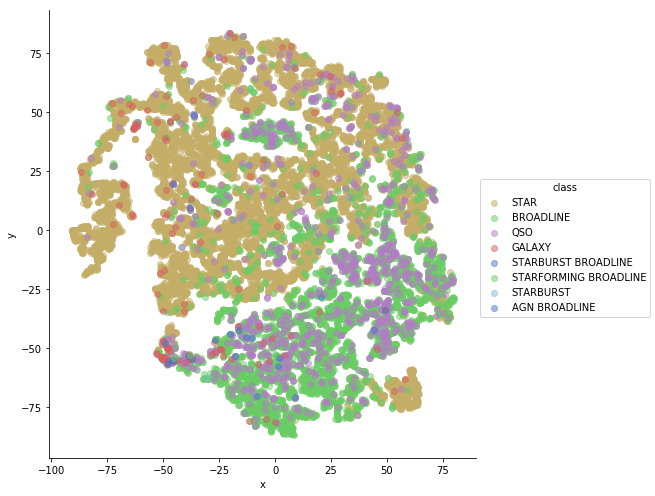

In [49]:
qso_subclass = data['CLASS'].copy()
qso_subclass.loc[data['CLASS'] == 'QSO'] = data.loc[data['CLASS'] == 'QSO', 'SUBCLASS']
qso_subclass = qso_subclass.fillna('QSO')
plot_embedding(X_embedded, qso_subclass, label_name='class')

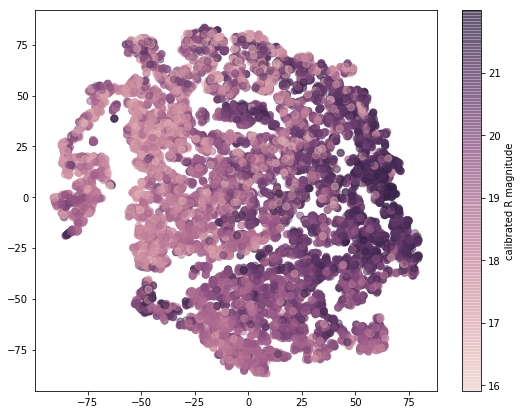

In [50]:
plot_embedding(X_embedded, data[MAG_GAAP_CALIB_R], label_name='calibrated R magnitude', is_continuous=True)

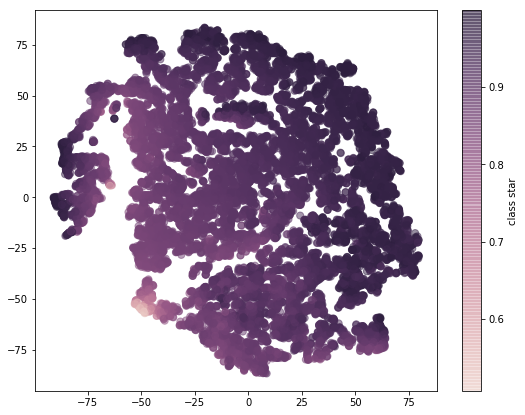

In [51]:
plot_embedding(X_embedded, data['CLASS_STAR'], label_name='class star', is_continuous=True)

## Non stars, colors + class_star

In [52]:
data = process_kids(data_path, sdss_cleaning=True, cut='r', subset='non-star')

Data shape: (91317, 43)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Extracting non-star subset: 17922
Cleaning SDSS: 17539 left
Removing R > 22: 17505 left


In [53]:
X = data[FEATURES['colors-cstar']]

In [54]:
X_scaled = MinMaxScaler().fit_transform(X)

In [55]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

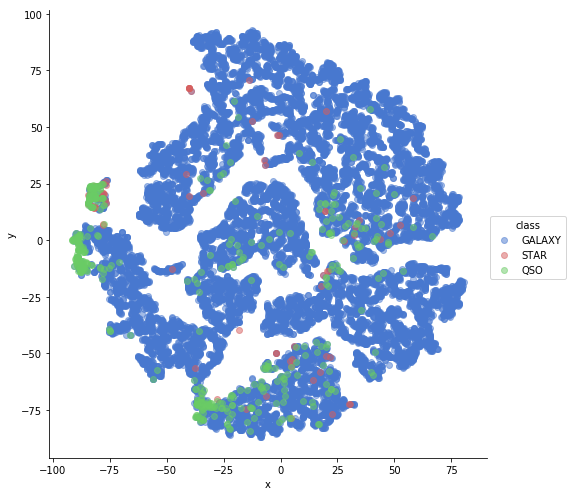

In [56]:
plot_embedding(X_embedded, data['CLASS'], label_name='class')

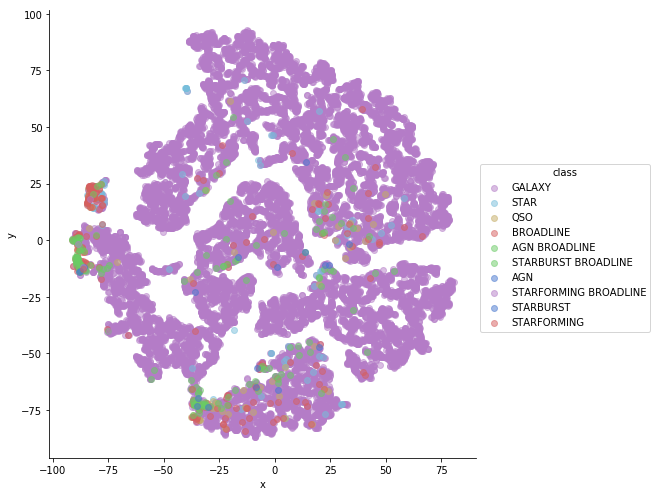

In [57]:
qso_subclass = data['CLASS'].copy()
qso_subclass.loc[data['CLASS'] == 'QSO'] = data.loc[data['CLASS'] == 'QSO', 'SUBCLASS']
qso_subclass = qso_subclass.fillna('QSO')
plot_embedding(X_embedded, qso_subclass, label_name='class')

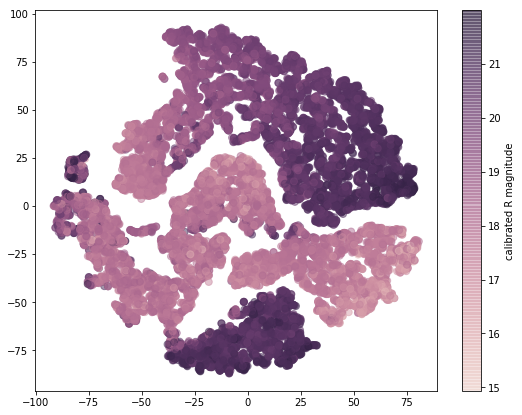

In [58]:
plot_embedding(X_embedded, data[MAG_GAAP_CALIB_R], label_name='calibrated R magnitude', is_continuous=True)

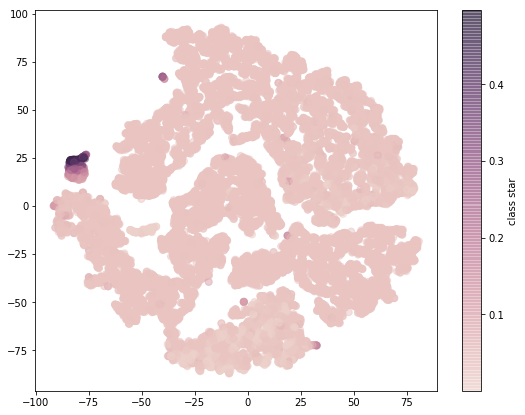

In [59]:
plot_embedding(X_embedded, data['CLASS_STAR'], label_name='class star', is_continuous=True)